<a href="https://www.kaggle.com/code/gatewj/bank-marketing-dataset?scriptVersionId=97307676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-data-set/bank-additional-names.txt
/kaggle/input/bank-marketing-data-set/bank-additional-full.csv


# Bank Marketing Dataset

The goal of this dataset is to explore whether a client will subscribe to a term deposit. This data comes from a Portuguese banking institution and was during a direct marketing campaign (phone calls).

## UCI-Bank-Marketing-Dataset

The following information is drawn from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Abstract**
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute information
### Input variables

### Bank client data
* age (numeric)
* job : type of job (categorical)
* marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (categorical)
* housing: has housing loan? (categorical)
* loan: has personal loan? (categorical)

## Related with the last contact of the current campaign
* contact: contact communication type (categorical)
* month: last contact month of year (categorical)
* day_of_week: last contact day of the week (categorical)
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical)


### Social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target)
* y - has the client subscribed a term deposit? (binary: 'yes','no')


### Relevant Papers
S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]

In [2]:
# Load in the data wrangling Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load the dataset and explore what the data looks like.

In [3]:
# Load data
#----------
bank = pd.read_csv('/kaggle/input/bank-marketing-data-set/bank-additional-full.csv', sep=';')

# Explore the top of the dataset
#------------------------------
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Additional information about the dataset.**

In [4]:
# Explore Additional Information about this dataset
#--------------------------------------------------
f = open('/kaggle/input/bank-marketing-data-set/bank-additional-names.txt', "r")
print(f.read())

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [5]:
# Check for null values and the datatypes
#----------------------------------------
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Double check for null values
#-----------------------------
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Checked for Null values two ways and this dataset appears not to have null values.

In [7]:
# How many rows and columns does the dataset have
#------------------------------------------------
bank.shape

(41188, 21)

In [8]:
# Quick statistical run down of the numerical columns
#----------------------------------------------------
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The different features show that they differ in the range of values. When modeling, standardization is required. 

In [9]:
# Some of the column names have periods. Get rid of the periods in the column names
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
#  Replace columns names that have periods (.) with an underscore (_)
new_column_names = bank.columns

bank.columns = new_column_names.str.replace('.','_')

bank.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis (EDA)
The goals of exploratory data analysis Our goals for exploring data are the following:

* Assemble.
* Clean
* Explore
* Summarize

More specifically, we'll look at the following topics.

### Exploratory Data Analysis (EDA)
* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

### Model Building
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once we've found a good model, how can we improve it?
* Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
* Reporting what we've found - if we had to present our work, what would we show someone?

To work through our analysis, we'll use pandas, Matplotlib and NumPy for data anaylsis, then well use, Scikit-Learn for machine learning and modelling tasks.

In [11]:
# Target Variable (Look at the counts)
#------------------------------------
bank['y'].value_counts(dropna=False)

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
# Target Variable (Look at the percentages)
#------------------------------------------
bank['y'].value_counts(normalize=True, dropna=False)

no     0.887346
yes    0.112654
Name: y, dtype: float64

There are more no's then yes's in this dataset, which is probably what is expected in the bank marketing subscriber environment. This is also the case of an imbalanced dataset and care must be taken into consideration when looking at accruacy, precision and recall. 

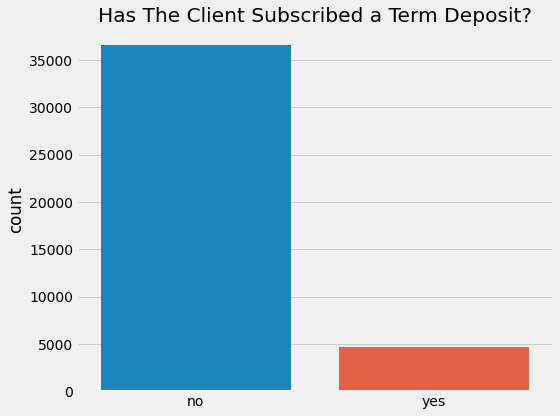

In [13]:
# plot the target variable and check just how imbalance the target variable is
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

sns.countplot(data = bank, x = 'y')

plt.xlabel('')
plt.title('Has The Client Subscribed a Term Deposit?')
plt.tight_layout();
plt.show()

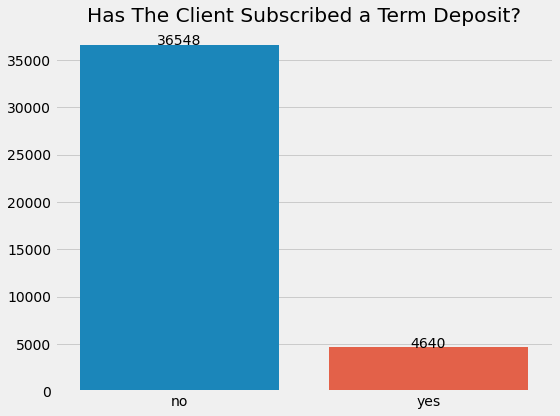

In [14]:
# Add labels
labels=bank['y'].value_counts().index
values=bank['y'].value_counts().values

plt.figure(figsize = (8, 6))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
    
plt.xlabel('')
plt.title('Has The Client Subscribed a Term Deposit?')
plt.tight_layout();
plt.show()

The plot shows that there is an imbalance between the number of no's and yes's which is the label dataset

Lets look at the age distribution of those that were subscribed the loan and those that were not.

<Figure size 720x864 with 0 Axes>

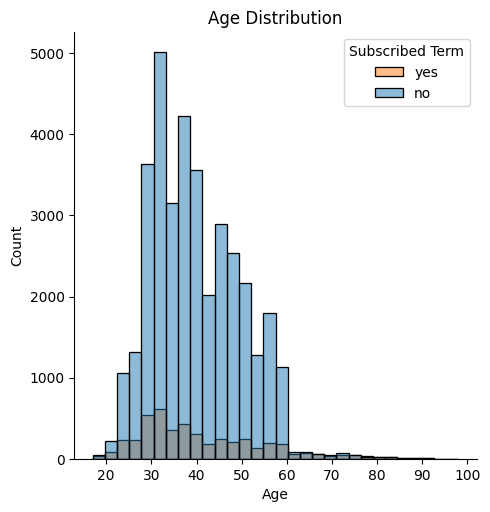

In [15]:
plt.figure(figsize = (10, 12))
plt.style.use('default')
g = sns.displot(data=bank, x='age', hue='y', bins=30, kde = False, legend=False)

plt.title('Age Distribution')
plt.xlabel('Age')

plt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])
plt.show()

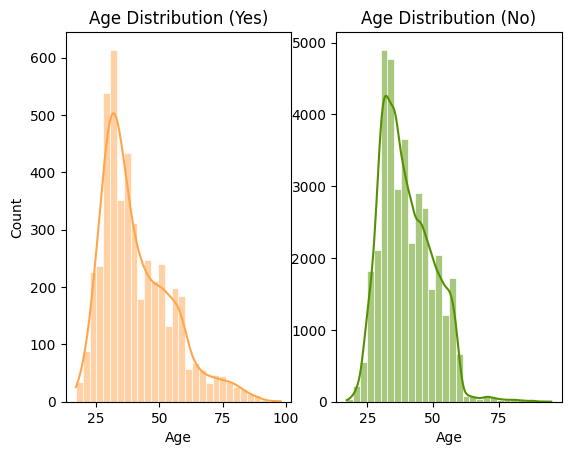

In [16]:
# call histplot on each axes
fig, axes = plt.subplots(1, 2)
plt.style.use('default')

#define figure size
sns.set(rc={"figure.figsize":(8, 4)})
 
sns.histplot(bank.loc[bank['y']=='yes']['age'], bins=30, kde = True,color='#ffa54c' , ax=axes[0])
axes[0].set_xlabel("Age", fontsize = 10)
axes[0].set_title('Age Distribution (Yes)')

sns.histplot(bank.loc[bank['y']=='no']['age'], bins=30, kde = True, color='#539100', ax=axes[1])
axes[1].set_xlabel("Age", fontsize = 10)
axes[1].set_ylabel('')
axes[1].set_title('Age Distribution (No)')

plt.show();

The age distribution between both the no's and the yes's is very similar

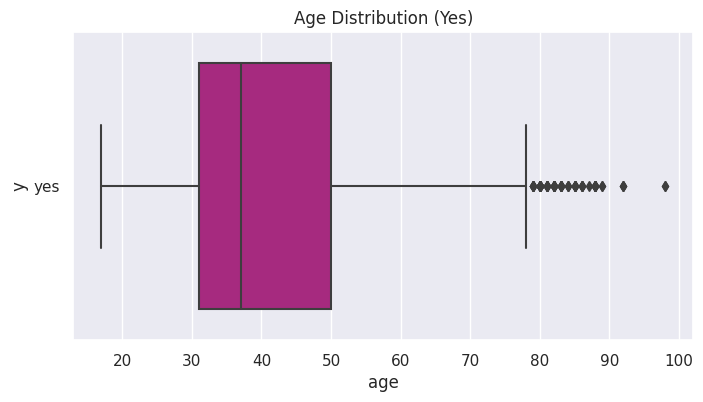

In [17]:
# Boxplot of Yes's for Age
#-------------------------
yes_data = bank.loc[bank['y']=='yes']

sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='y',x='age',orient = 'h', color = '#bb1587')
g.set_title('Age Distribution (Yes)')

plt.show(g);

**The majority of clients that are subscribed a loan deposit ranges between the ages of 30 and 50, which is also prime income ages.**

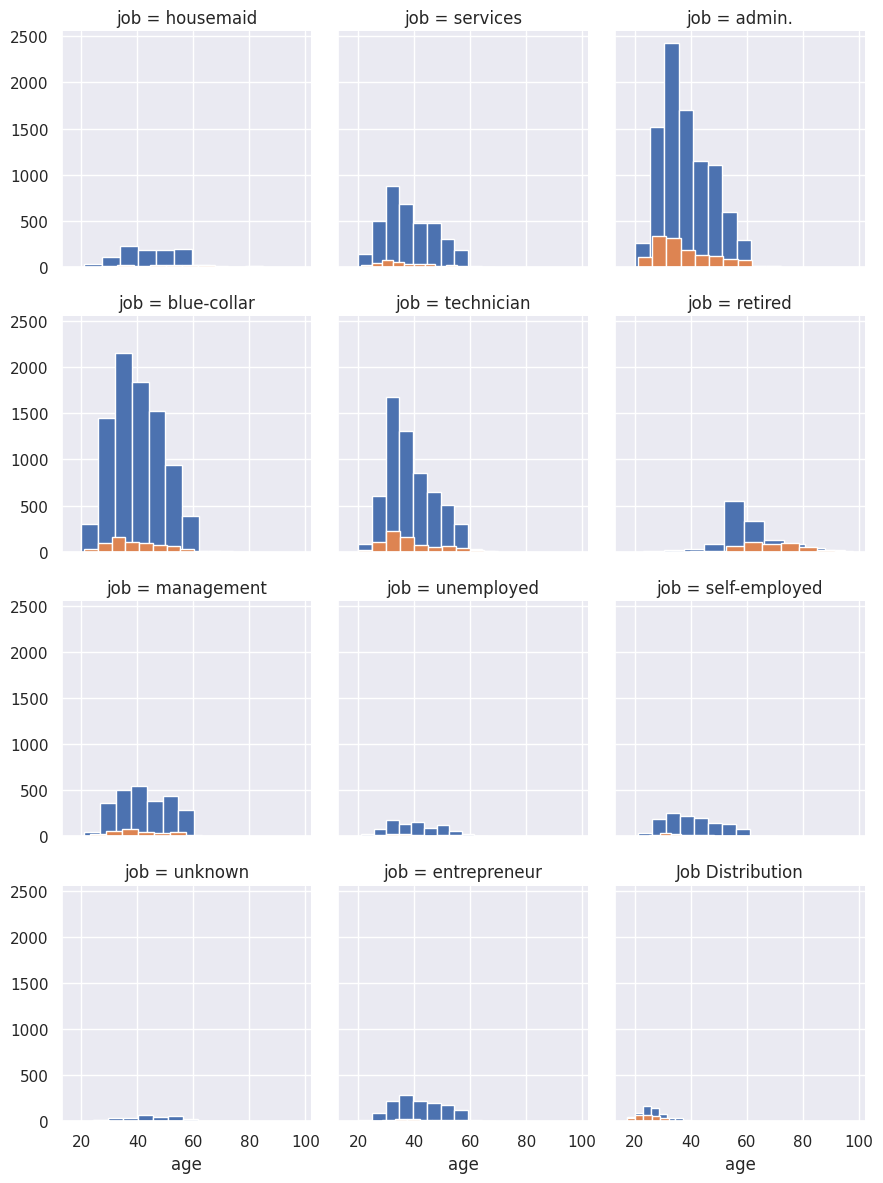

In [18]:
#=======================================
# Create "Wrapped" Small Multiple Chart
#=======================================
grid_layout = sns.FacetGrid(bank, col = 'job', hue='y', col_wrap = 3)
grid_layout.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

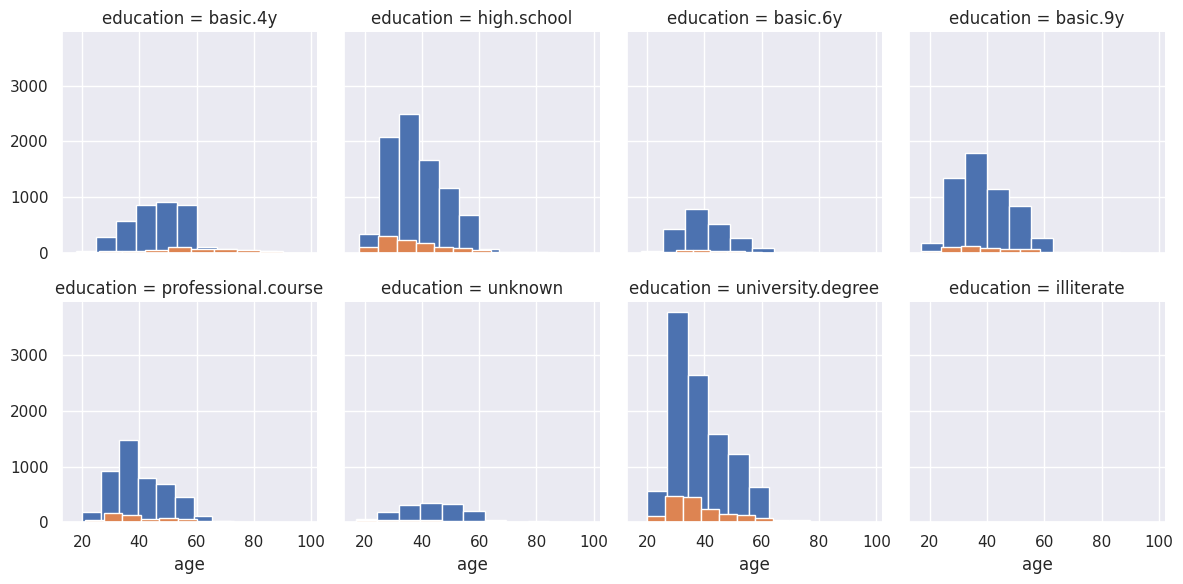

In [19]:
grid_layout = sns.FacetGrid(bank, col = 'education', hue='y', col_wrap = 4)
grid_layout.map(plt.hist, 'age');

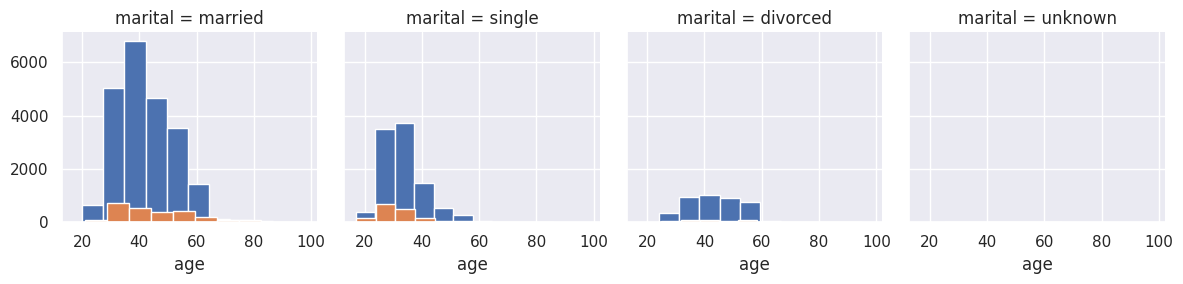

In [20]:
grid_layout = sns.FacetGrid(bank, col = 'marital', hue='y', col_wrap = 4)
grid_layout.map(plt.hist, 'age');

**More married couples applied and subscribed a term deposit.**

In [21]:
# Check the top of the dataset again
#-----------------------------------
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
# Re-label Values in the Eduation field
#--------------------------------------
educ_dict_mapping = {'basic.4y': 'Basic 4year',
                     'high.school': 'High School',
                     'basic.6y': 'Basic 6year',
                     'basic.9y': 'Basic 9year',
                     'professional.course':'Professional Course',
                     'unknown': 'Unknown',
                     'university.degree':'University Degree',
                     'illiterate':'Illiterate'}

bank['education'] = bank['education'].replace(educ_dict_mapping)
bank['education'].unique()

array(['Basic 4year', 'High School', 'Basic 6year', 'Basic 9year',
       'Professional Course', 'Unknown', 'University Degree',
       'Illiterate'], dtype=object)

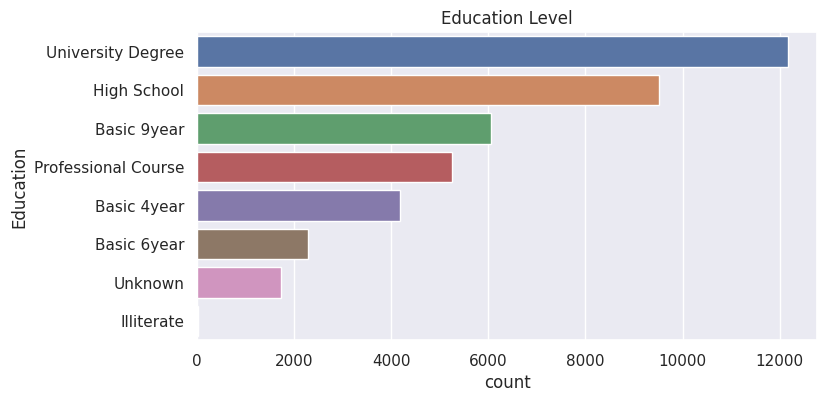

In [23]:
sns.countplot(data = bank, y = 'education', order = bank['education'].value_counts().index)
plt.ylabel('Education')
plt.title('Education Level')
plt.show()

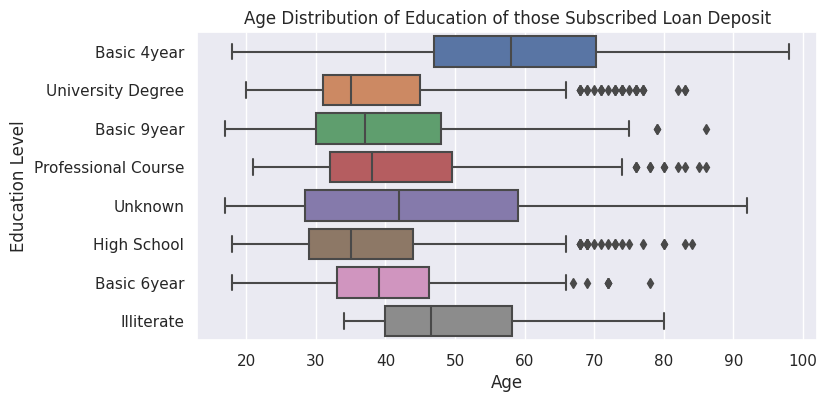

In [24]:
# y=yes versus education
# Boxplot of Yes's for Age
yes_data = bank.loc[bank['y']=='yes']

sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='education',x='age',orient = 'h')

g.set_xlabel('Age')
g.set_ylabel('Education Level')
g.set_title('Age Distribution of Education of those Subscribed Loan Deposit')

plt.show(g);

This graph demonstrates the more education one has the earlier in age one can obtain a subscribed loan deposit. This is probably due to a number of things, income level, savings amount etc. Lets also explore the distribution of each education category of those attaining a loan.

In [25]:
yes_data['education'].value_counts(normalize=True).sort_values(ascending=False)

University Degree      0.359914
High School            0.222198
Professional Course    0.128233
Basic 9year            0.101940
Basic 4year            0.092241
Unknown                0.054095
Basic 6year            0.040517
Illiterate             0.000862
Name: education, dtype: float64

In [26]:
education_percentages = (yes_data['education'].value_counts(normalize=True).rename('percentage').mul(100)
                     .reset_index()
                     .sort_values('percentage', ascending=False))

# Rename the Index field to Education Level
education_percentages.rename(columns={'index':'education_level'}, inplace=True)

# Print out the results before plotting
education_percentages

,education_level,percentage
0,University Degree,35.991379
1,High School,22.219828
2,Professional Course,12.823276
3,Basic 9year,10.193966
4,Basic 4year,9.224138
5,Unknown,5.409483
6,Basic 6year,4.051724
7,Illiterate,0.086207


Lets explore the educational level of those members who were subscribed a loan.

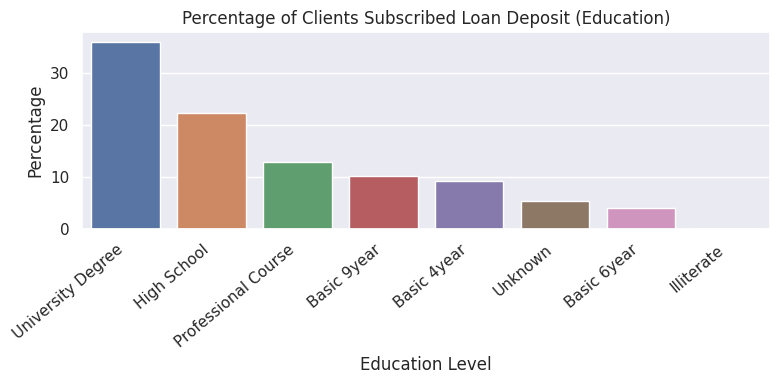

In [27]:
# Set the plot up
ax = sns.barplot(data=education_percentages,x='education_level',y='percentage')

# Set up the axes
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Clients Subscribed Loan Deposit (Education)')

# Rotate the axes labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

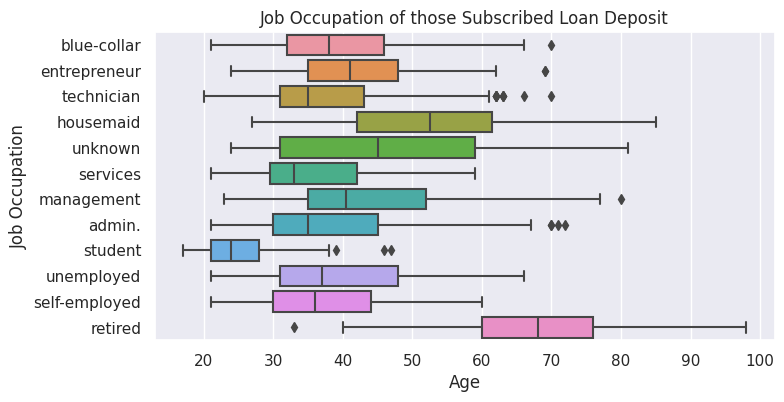

In [28]:
# Look at those Subscribed a loan job occupation
#-----------------------------------------------
sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='job',x='age',orient = 'h')

g.set_xlabel('Age')
g.set_ylabel('Job Occupation')
g.set_title('Job Occupation of those Subscribed Loan Deposit')

plt.show(g);

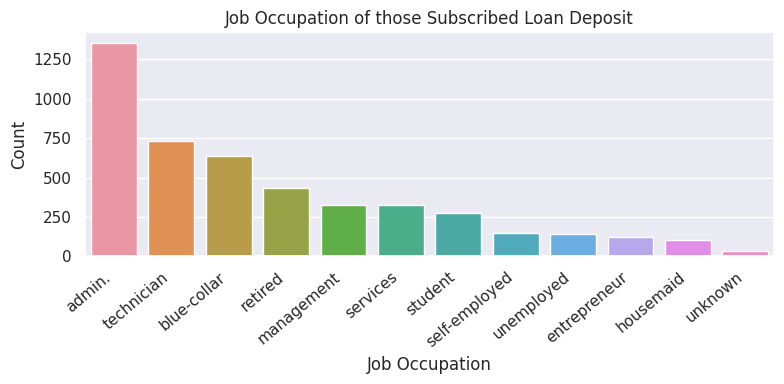

In [29]:
# Another way to look at job occupations of those Subscribed
#-----------------------------------------------------------
ax = sns.countplot(data=yes_data,x='job', order=yes_data.job.value_counts().index)

# Set up the plot axes
sns.set_style("whitegrid")
ax.set_ylabel('Count')
ax.set_xlabel('Job Occupation')
ax.set_title('Job Occupation of those Subscribed Loan Deposit')

# Rotate the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

For job occupation, in order to be subscribed a loan deposit, the data shows that the client has to be more likely a part of the standard job occutations as compared with other occupations such as entrepreneur, housemaid. Almost proof of steady income.

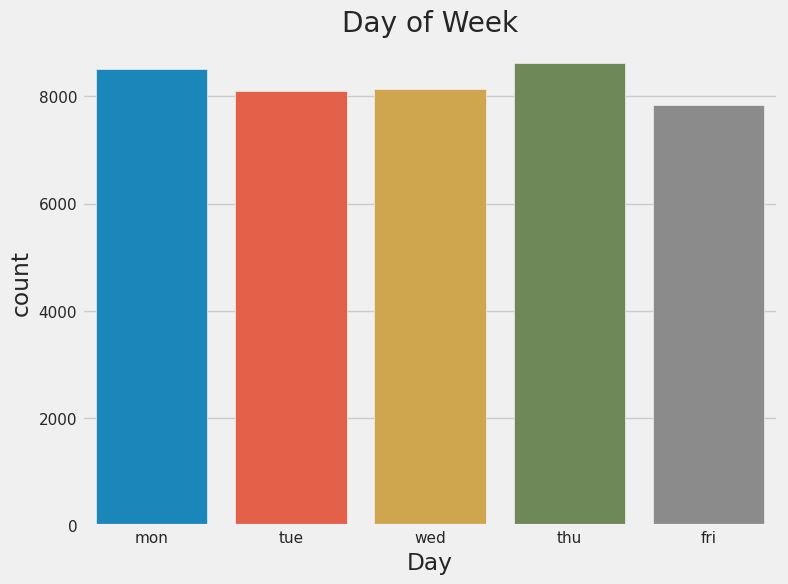

In [30]:
# Not sure how important the day of the week, last contact 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

sns.countplot(data = bank, x = 'day_of_week')
plt.xlabel('Day')
plt.title('Day of Week')
plt.show()

# Modeling I: Feature Engineering and Selection

In [31]:
# Before we start with feature engineering, lets review our dataset again
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [32]:
# Find the numerical features
#----------------------------
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = bank.select_dtypes(include=numerics).columns.tolist()

# Numerical Features
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [33]:
# Find the categorical variables
#-------------------------------
objects = ['object','category', 'bool']
cat_features = bank.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

# Categorical Features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## Numerical Feature Selection

In [34]:
# employment variation rate - quarterly indicator (numeric)   # Maybe this value affects clients getting approved for a loan deposit
bank['emp_var_rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

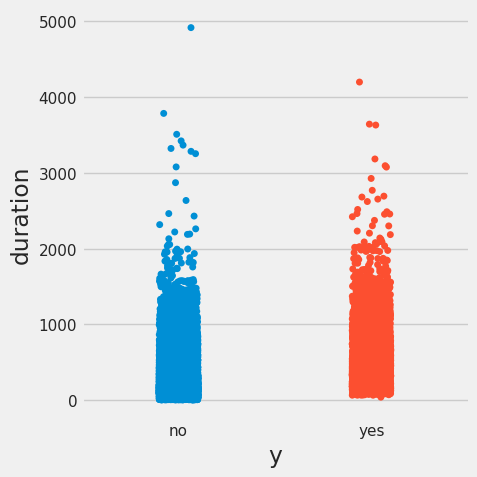

In [35]:
# duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 
# target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after 
# the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have 
# a realistic predictive model.

sns.catplot(data=bank, x='y',y='duration')

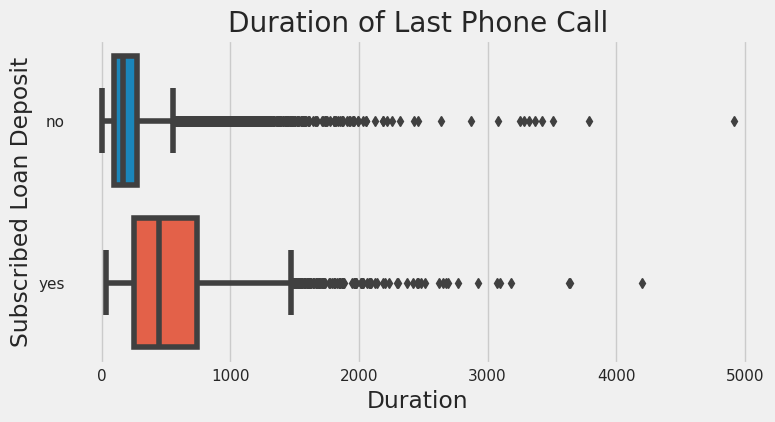

In [36]:
g = sns.boxplot(data=bank, x='duration', y='y',orient = 'h')

g.set_xlabel('Duration')
g.set_ylabel('Subscribed Loan Deposit')
g.set_title('Duration of Last Phone Call')

plt.show(g);

In [37]:
# Look at the numberical features correlation
bank[num_features].corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

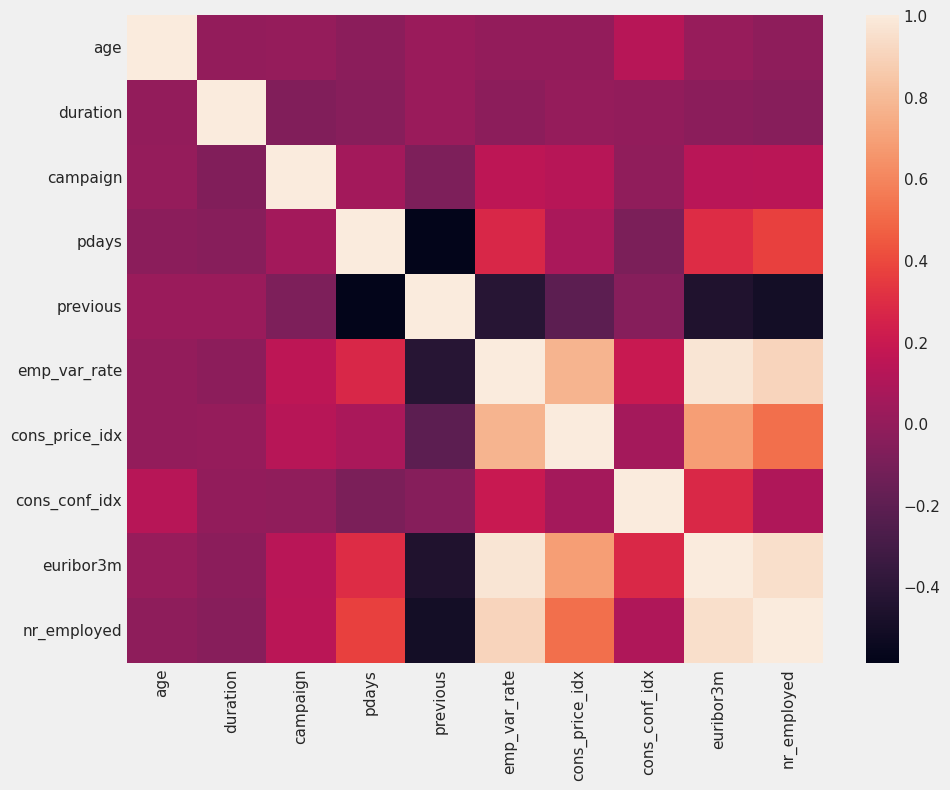

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(bank[num_features].corr())

In [39]:
# Create a correlation matrix
corr_metrics = bank[num_features].corr(method='pearson')
corr_metrics.style.background_gradient()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### Definition of some numerical features
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)
* emp.var.rate: employment variation rate - quarterly indicator (numeric)

The correlation between euribor3m and nr_employed is extremely high 94.51%

So is:
* euribor3m - emp_var_rate: 97.2256
* nr_employed - emp_var_rate: 90.60%
* emp_var_rate - cons_price_idx: 77.53%
* cons.price.idx: consumer price index - monthly indicator (numeric)

Which features to keep and which to disregard because of high correlation

In [40]:
# If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity
columns = np.full((corr_metrics.shape[0],), True, dtype=bool)
for i in range(corr_metrics.shape[0]):
    for j in range(i+1, corr_metrics.shape[0]):
        if corr_metrics.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = corr_metrics.columns[columns]

In [41]:
numerical_selected_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

In [42]:
bank[numerical_selected_columns].corr(method='pearson').style.background_gradient()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000


The correlation between the cons_price_idx and the emp_var_rate is still fairly high but we will watch out for it during modeling

In [43]:
bank[numerical_selected_columns].corr(method='pearson').style.background_gradient()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000


## Categorical Features Pre-Processing

In [44]:
bank['job'] = bank['job'].str.replace('-','_').str.replace('.','', regex=True)

bank['job'].value_counts()

admin            10422
blue_collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self_employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [45]:
#poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
bank['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [46]:
# Create a Contigency table
#--------------------------
contingency_table = pd.crosstab(
    bank['y'],
    bank['job'],
    margins = True
)
contingency_table

job,admin,blue_collar,entrepreneur,housemaid,management,retired,self_employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293,36548
yes,1352,638,124,106,328,434,149,323,275,730,144,37,4640
All,10422,9254,1456,1060,2924,1720,1421,3969,875,6743,1014,330,41188


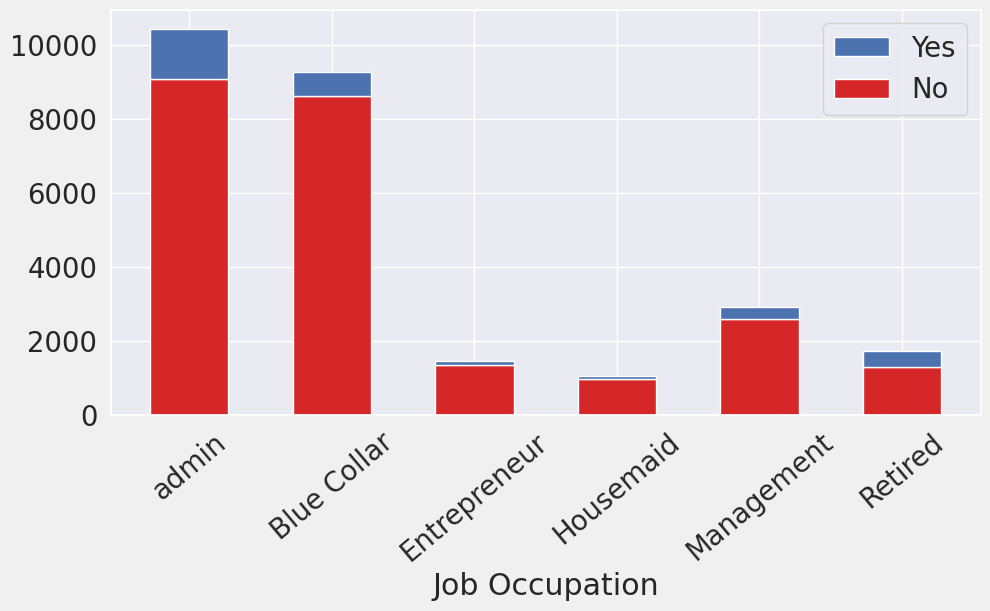

In [47]:
#Assigns the frequency values
#----------------------------
no_count = contingency_table.iloc[0][0:6].values
yes_count = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["admin","Blue Collar","Entrepreneur","Housemaid","Management","Retired"]
p1 = plt.bar(categories, no_count, 0.55, color='#d62728')
p2 = plt.bar(categories, yes_count, 0.55, bottom=no_count)
plt.legend((p2[0], p1[0]), ('Yes', 'No'))


plt.xlabel('Job Occupation')
plt.xticks(rotation=40)
#plt.ylabel('Count')
plt.show()

## Load Machine Learning Tools

In [48]:
# Machine Learning Imports
#--------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Machine Learning Algorithms
#--------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier


# Model Selection
#------------------------------------
from sklearn.model_selection import GridSearchCV


# Metrics
#-------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

### Preprocess the Data
The next step is to set up a pipeline to preprocess the features. We will impute all missing values with a constant, and one-hot encode all categorical features.

In [49]:
# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

## Fit the Models and Evaluate Performance

In [50]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

## Logistic Regression (Base Model)

In [51]:
# Import train_test_split function
#---------------------------------
from sklearn.model_selection import train_test_split

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9005826656955572

In [52]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)
y_preds

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[7208,  101],
       [ 718,  211]])

In [54]:
# Probably easier to visualize
#-----------------------------

# One way to do it is using pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,no,yes
Actual Label,,
no,7208,101
yes,718,211


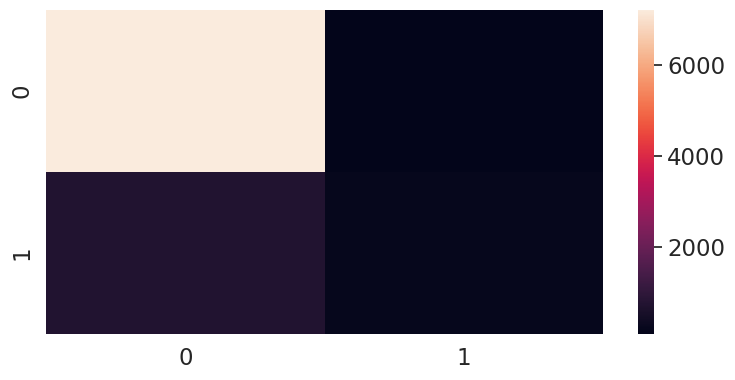

In [55]:
# Make our confustion matrix more visual with Seaborn's heatmap()
#----------------------------------------------------------------
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)
plt.show()

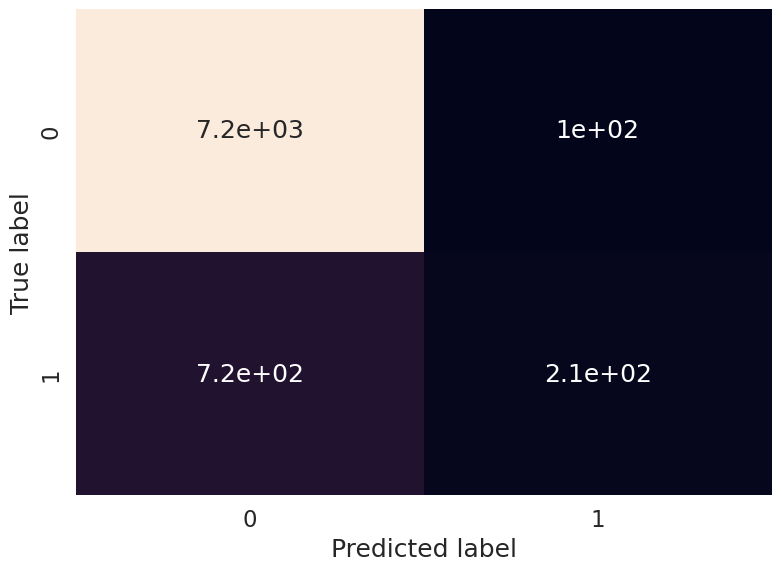

In [56]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(conf_mat,
                     annot=True,      # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
   
    
plot_conf_mat(conf_mat)    

In [57]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7309
         yes       0.68      0.23      0.34       929

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



Given the precision is high for no but low for yes and the recall is also very high, we also know that we have an unbalanced dataset,we will stratify the dataset based on the target variable

### Unbalanced Dataset lets stratify the dataset train and test sit and fit the model again

In [58]:
# Creating a preprocessing and modelling pipepline (without taking into account)
#-------------------------------------------------------------------------------
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)   # Added stratify since the  
                                                                                       #   dataset is unbalanced

# Train set class weights
pd.Series(y_train).value_counts(normalize=True)

no     0.887344
yes    0.112656
Name: y, dtype: float64

In [59]:
# Test set class weights
pd.Series(y_test).value_counts(normalize=True)

no     0.887351
yes    0.112649
Name: y, dtype: float64

### Notes:
We commonly use train_test_split function of Sklearn to divide the data and Sklearn provides handy argument - stratify to generate stratified splits

Setting stratify to the target (y) yielded identical distributions in both the train and test sets.
Altered class weights are a serious problem that might make a model more biased towards a particular class. Forgetting to generate stratified splits might result in a more favorable train or test sets 

When using cross-validation or pipelines, you don’t have to worry about this problem because CV splitters perform stratification under the hood using StratifiedKFold for classification problems.

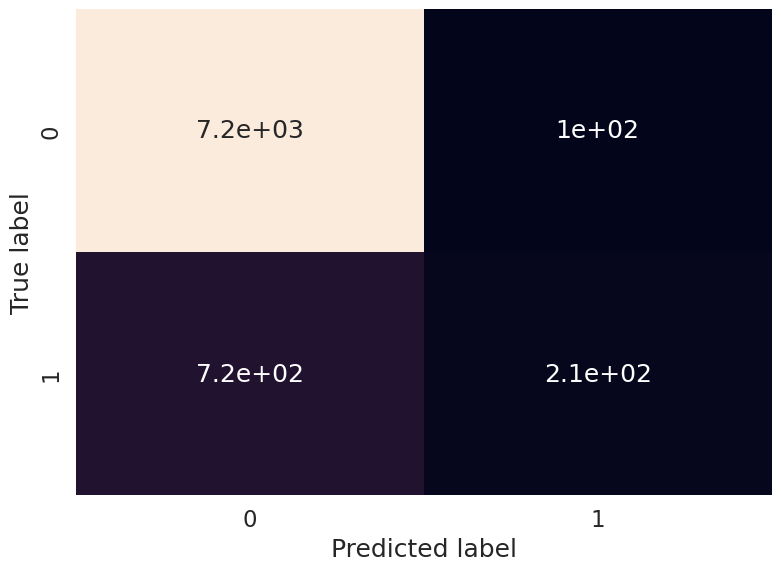

In [60]:
# Fit and score the model
#------------------------
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [61]:
# Classification Report
#----------------------

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.67      0.23      0.34       928

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [62]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def evaluate_preds(y_true, y_preds):
    """
    Perfoms evlauation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, pos_label="yes")
    recall = recall_score(y_true, y_preds, pos_label="yes")
    f1 = f1_score(y_true, y_preds, pos_label="yes")
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [63]:
precision_score(y_test, y_preds, pos_label="yes")

0.6719745222929936

In [64]:
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 90.05%
Precision: 0.67
Recall: 0.23
F1 score: 0.34


{'accuracy': 0.9, 'precision': 0.67, 'recall': 0.23, 'f1': 0.34}

In [65]:
model.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='constant')),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  ['age', 'campaign', 'pdays', 'previous',
                                   'emp_var_rate', 'cons_price_idx',
                                   'cons_conf_idx']),
                                 ('cat',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['job', 'marital', 'education', 'default',
                                   'housing', 'loan', 'contact', 'month',
                                   'day_of_week', 'poutcome'])]),
 'clf': LogisticRegression(solver='liblinear'

In [66]:
import sklearn
print(sklearn.__version__)

0.23.2


In [67]:
num_features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx']

In [68]:
#model['preprocessor'].transformers_[0][1][0].get_feature_names(num__features)#[0][0]#['imputer']#.get_feature_names(num__features)

In [69]:
model['preprocessor'].transformers_[1][1]

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [70]:
#from feature_importance import FeatureImportance
#feature_importance = FeatureImportance(pipe)
#feature_importance.plot(top_n_features=25)
model['preprocessor'].transformers_[1][1]['onehot']\
                   .get_feature_names(cat_features)

array(['job_admin', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic 4year',
       'education_Basic 6year', 'education_Basic 9year',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed

In [71]:
logistic_feature_names = num_features + list(model['preprocessor'].transformers_[1][1]['onehot'].get_feature_names(cat_features))

logistic_feature_names

['age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'job_admin',
 'job_blue_collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self_employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic 4year',
 'education_Basic 6year',
 'education_Basic 9year',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 

In [72]:
# Get the names of each feature
#feature_names = model.named_steps["preprocessor"]#.get_feature_names()
X.columns#feature_names

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'poutcome'],
      dtype='object')

In [73]:
# Get the coefficients of each feature
#model['clf']
# Get the coefficients of each feature
coefs = model.named_steps["clf"].coef_.flatten()
coefs

array([ 0.01700172, -0.12455213, -0.22354952, -0.04080052, -1.20076009,
        0.68172923,  0.11422266, -0.0560068 , -0.15799585, -0.13740273,
       -0.06096223, -0.12640629,  0.24194243, -0.10699288, -0.13842371,
        0.21013057, -0.07922376, -0.00559433, -0.22294395, -0.25245833,
       -0.18604229, -0.12981707, -0.07156185, -0.2501991 , -0.10424536,
       -0.23489272, -0.17354662,  0.53864505, -0.16111481, -0.09370965,
       -0.16081632, -0.15928209, -0.38795736, -0.09264009, -0.18265335,
       -0.231631  , -0.22559517, -0.14946186, -0.231631  , -0.25878667,
       -0.0307446 , -0.60913493, -0.10793905,  0.12505046,  0.1327879 ,
        0.01224972, -0.39034608,  1.01938298, -0.66521944, -0.45032958,
       -0.15791033, -0.15760612, -0.16565568, -0.33413869, -0.0575914 ,
       -0.0935149 ,  0.01102114, -0.5333641 , -0.17514445,  0.06862902])

In [74]:
col_names_coef = pd.concat([pd.Series(logistic_feature_names), pd.Series(coefs)], axis=1)

data = {'feature_name': logistic_feature_names,
        'coefficients': coefs  
}

logistic_df = pd.DataFrame(data)

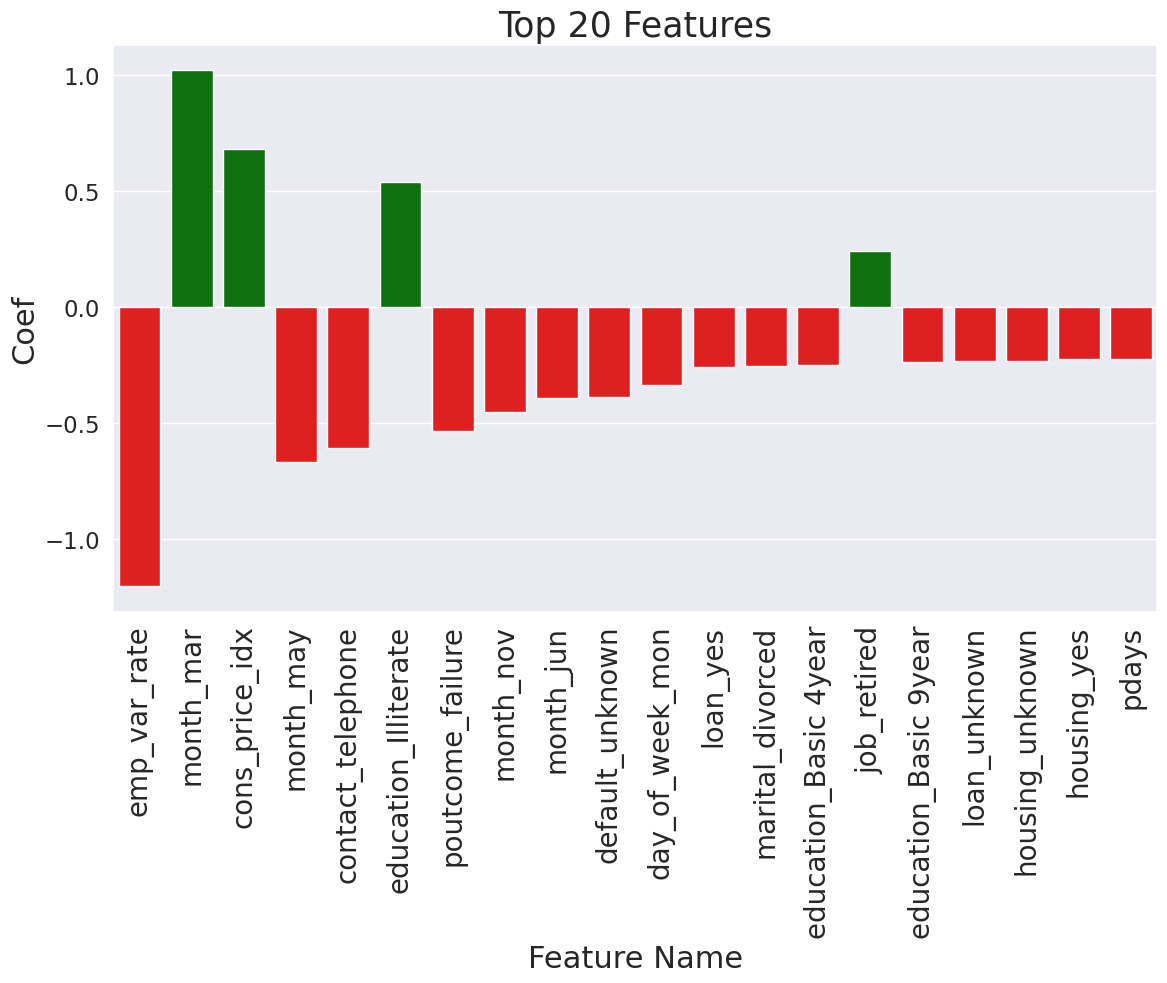

In [75]:
# Sort the features by the absolute value of their coefficient
logistic_df["abs_value"] = logistic_df["coefficients"].apply(lambda x: abs(x))
logistic_df["colors"] = logistic_df["coefficients"].apply(lambda x: "green" if x > 0 else "red")
logistic_df = logistic_df.sort_values("abs_value", ascending=False)



fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature_name",
            y="coefficients",
            data=logistic_df.head(20),
           palette=logistic_df.head(20)["colors"])


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

plt.savefig("top_20_features.jpg") #save as jpg
plt.show()

Explain what the features coeffients represent as well as the odds ratio.

### The Dataset is an imbalanced Dataset with more No's then Yes's

Lets shuffle the dataset and resample to make sure they have the same number of each sample

In [76]:
# Subset only the No tracks, and then only the yes tracks
deposit_no = bank.loc[bank['y']=='no']
deposit_yes = bank.loc[bank['y']=='yes']

# sample the rocks songs to be the same number as there are hip-hop songs
deposit_no = deposit_no.sample(n = len(deposit_yes),random_state=10)


# concatenate the dataframes rock_only and hop_only
bank_sampled = pd.concat([deposit_no, deposit_yes])


features = num_features + cat_features
X_sample = bank_sampled[features]
y_sample = bank_sampled["y"]

In [77]:
X_sample.shape

(9280, 17)

In [78]:
# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)


# Train set class weights
pd.Series(y_train).value_counts(normalize=True)

no     0.50229
yes    0.49771
Name: y, dtype: float64

In [79]:
# Test set class weights
pd.Series(y_test).value_counts(normalize=True)

yes    0.509159
no     0.490841
Name: y, dtype: float64

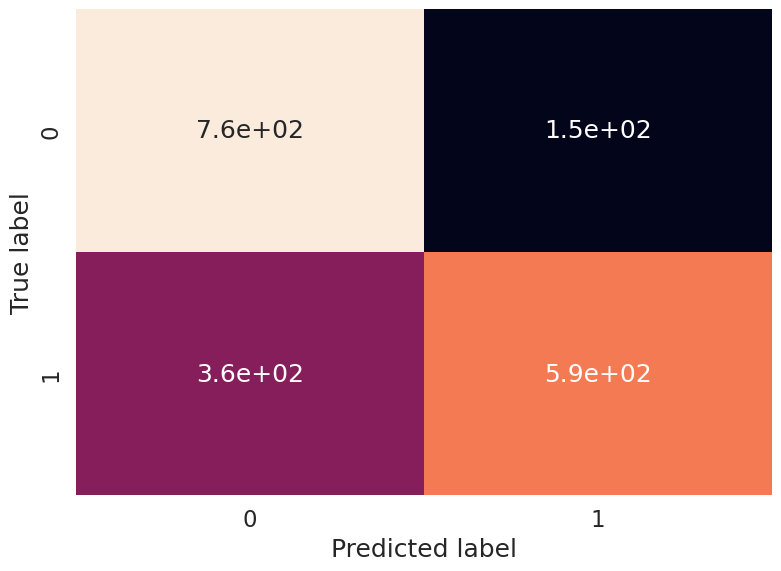

In [80]:
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [81]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.68      0.83      0.75       911
         yes       0.79      0.62      0.70       945

    accuracy                           0.73      1856
   macro avg       0.74      0.73      0.72      1856
weighted avg       0.74      0.73      0.72      1856



In [82]:
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 72.63%
Precision: 0.79
Recall: 0.62
F1 score: 0.70


{'accuracy': 0.73, 'precision': 0.79, 'recall': 0.62, 'f1': 0.7}

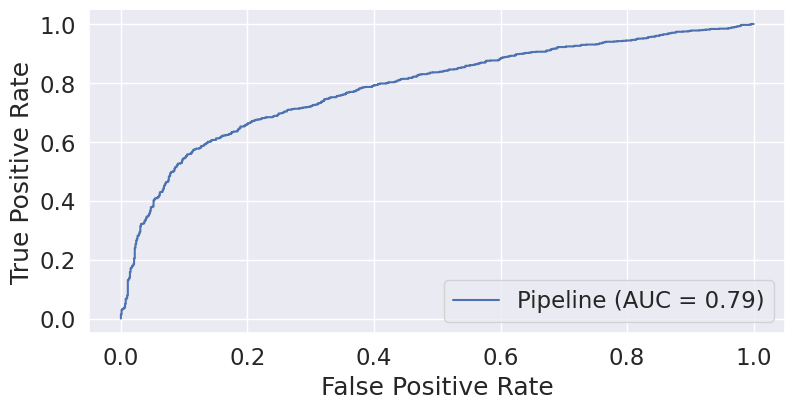

In [83]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)


#y_score = model.predict(X_test)
#y_score = model.decision_function(X_test)

In [84]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.9783559 , 0.55438162, 0.36065068, 0.68189715, 0.33696939,
        0.65708436, 0.21247513, 0.30073603, 0.28126506, 0.83191476]),
 1856)

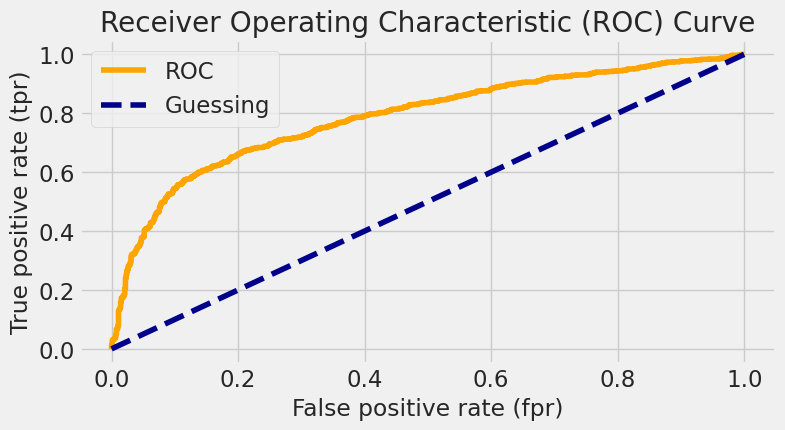

In [85]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

## Logistic Regression (Taking Into Account Ordinal Features)

In [86]:
bank2 = pd.read_csv('/kaggle/input/bank-marketing-data-set/bank-additional-full.csv', sep=';')

#  Replace columns names that have periods (.) with an underscore (_)
new_column_names2 = bank2.columns

bank2.columns = new_column_names2.str.replace('.','_')

bank2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [87]:
numerical_selected_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

In [88]:
# Categorical Features
cat_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [89]:
features = num_features + cat_features + ['education', 'month', 'day_of_week'] #, 'month', 'day_of_week']

# Create dataset to train and test
X = bank2[features]
y = bank2["y"]

In [90]:
X.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job,marital,default,housing,loan,contact,poutcome,education,month,day_of_week
0,56,1,999,0,1.1,93.994,-36.4,housemaid,married,no,no,no,telephone,nonexistent,basic.4y,may,mon
1,57,1,999,0,1.1,93.994,-36.4,services,married,unknown,no,no,telephone,nonexistent,high.school,may,mon
2,37,1,999,0,1.1,93.994,-36.4,services,married,no,yes,no,telephone,nonexistent,high.school,may,mon
3,40,1,999,0,1.1,93.994,-36.4,admin.,married,no,no,no,telephone,nonexistent,basic.6y,may,mon
4,56,1,999,0,1.1,93.994,-36.4,services,married,no,no,yes,telephone,nonexistent,high.school,may,mon


In [91]:
from sklearn.preprocessing import OrdinalEncoder

# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
])


# Day of Week Categorical Features
day_feature = ['day_of_week']
day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])



In [92]:
# Import train_test_split function 
from sklearn.model_selection import train_test_split

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [93]:
y_train.value_counts(normalize=True)

no     0.887344
yes    0.112656
Name: y, dtype: float64

In [94]:
y_test.value_counts(normalize=True)

no     0.887351
yes    0.112649
Name: y, dtype: float64

In [95]:
X_train.shape, y_train.shape

((32950, 17), (32950,))

In [96]:
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8965768390386016

In [97]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)
y_preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

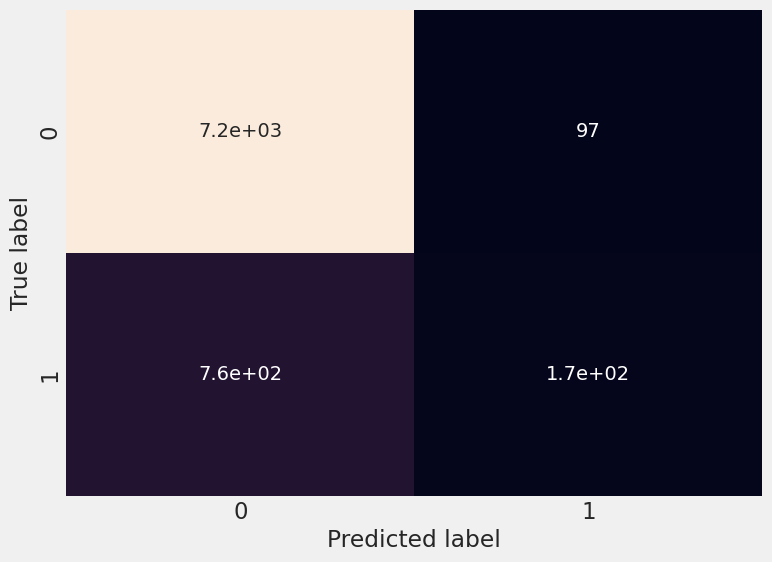

In [98]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [99]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      7310
         yes       0.64      0.19      0.29       928

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



In [100]:
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 89.66%
Precision: 0.64
Recall: 0.19
F1 score: 0.29


{'accuracy': 0.9, 'precision': 0.64, 'recall': 0.19, 'f1': 0.29}

In [101]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.02675663, 0.05324376, 0.03717744, 0.09808376, 0.05777142,
        0.45109423, 0.05296748, 0.22177474, 0.70544075, 0.08665254]),
 8238)

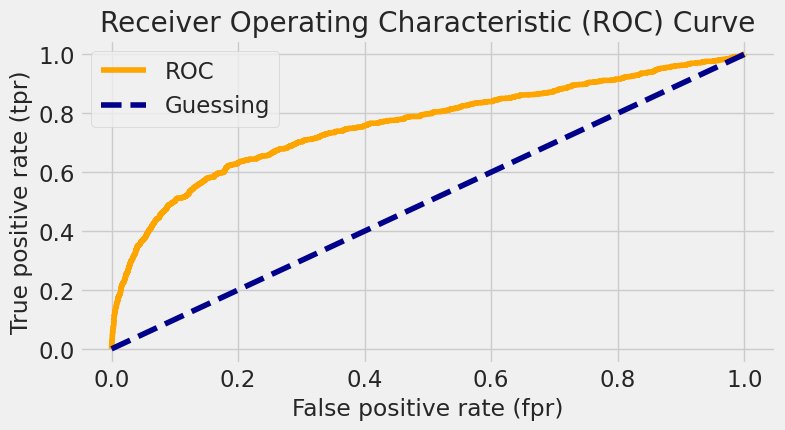

In [102]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

## Decicion Tree Classifier Regression

In [103]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", DecisionTreeClassifier())   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Train set class weights
pd.Series(y_train).value_counts(normalize=True)

no     0.887344
yes    0.112656
Name: y, dtype: float64

In [104]:
# Train set class weights
pd.Series(y_test).value_counts(normalize=True)

no     0.887351
yes    0.112649
Name: y, dtype: float64

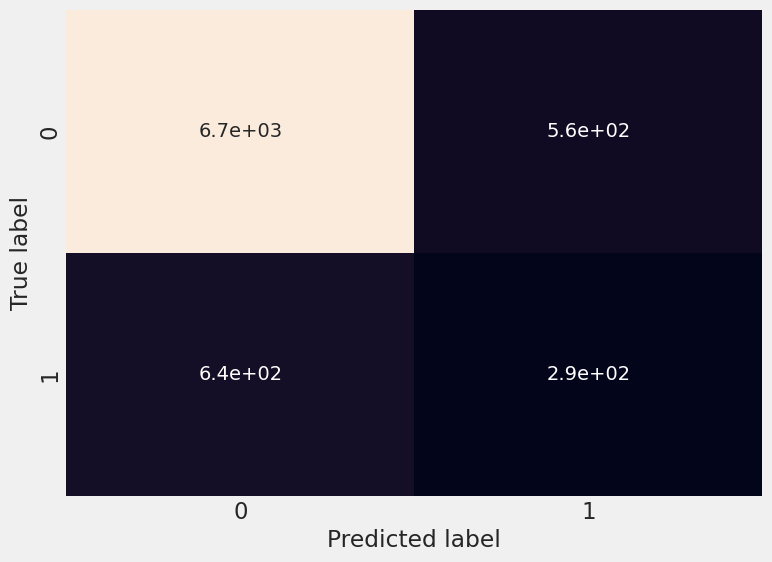

In [105]:
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

In [106]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.92      0.92      7310
         yes       0.34      0.31      0.32       928

    accuracy                           0.85      8238
   macro avg       0.63      0.62      0.62      8238
weighted avg       0.85      0.85      0.85      8238



In [107]:
from sklearn import metrics
y_pred = pd.Series(model.predict(X_test))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8542121874241321


In [108]:
#from sklearn.tree import plot_tree
#
#fig = plt.figure(figsize=(25,20))
#_ = plot_tree(model.named_steps["clf"], feature_names=X_train.columns),  
#                #class_names=class_types, filled=True)

In [109]:
model.named_steps['clf']

DecisionTreeClassifier()

In [110]:
#from sklearn import tree
#import graphviz 

#dot_data = tree.export_graphviz(model.named_steps['clf'], out_file=None)#, 
                                #feature_names=X_train.columns,  
                                #class_names=y_train,  
                                #filled=True, rounded=True,  
                                #special_characters=True)

#graph = graphviz.Source(dot_data) 

#graph 

In [111]:
#split = KFold(n_splits=4, shuffle=True, random_state=1234)

## Choose a class of models and specify hyperparameters

The next step is to choose a class of models and specify hyperparameters. This is just for starters and we will see later how we can specify a range of values for hyperparameters and tune the model for optimal performance! We will pick the simple, yet very effective Decision Tree and Random Forest models. We will use scikit-learn to fit the models and evaluate their performance.

## Fit Model and Evaluate Performance

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [113]:
models = [
    ('LR', LogisticRegression(solver='liblinear')),
    ('KNN', KNeighborsClassifier()),
   # ('NB', GaussianNB()),
   # ('SVM', SVC(gamma='auto')),
  ("Decision Tree", DecisionTreeClassifier()),
  ("Random Forest", RandomForestClassifier(random_state=1234,n_jobs=-1)),
  
]

In [114]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [115]:
results = []
names = []


num_folds = 10
seed = 7
scoring = 'accuracy'


#split = KFold(n_splits=4, shuffle=True, random_state=1234)

for name, model in models:
    
    # Provides train/test indices to split data in train/test sets. 
    #  Split dataset into k consecutive folds (without shuffling by default).
    split = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    
    # Compose data preprocessing and model into a single pipeline
    steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Compute cross validation accuracy for each model
    cv_results = cross_val_score(steps, X, y, cv=split, scoring="accuracy", n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    
    # output:
    min_score = round(np.min(cv_results), 4)
    max_score = round(np.max(cv_results), 4)
    mean_score = round(np.mean(results), 4)
    std_dev = round(np.std(results), 4)
    print(f"[{name}] Cross Validation Accuarcy Score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

[LR] Cross Validation Accuarcy Score: 0.8994 +/- 0.0048 (std) min: 0.892, max: 0.9046
[KNN] Cross Validation Accuarcy Score: 0.8952 +/- 0.0061 (std) min: 0.8842, max: 0.8949
[Decision Tree] Cross Validation Accuarcy Score: 0.8815 +/- 0.02 (std) min: 0.8465, max: 0.8594
[Random Forest] Cross Validation Accuarcy Score: 0.8818 +/- 0.0175 (std) min: 0.8764, max: 0.8898


In [116]:
steps.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp_var_rate',
                                                   'cons_price_idx',
                                                   'cons_conf_idx']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                  

In [117]:
#features_1 = features[0:10]
#importances = steps[1].feature_importances_[0:10]
#indices = np.argsort(importances)
#
#plt.title('Feature importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('relative importance')
#plt.show()

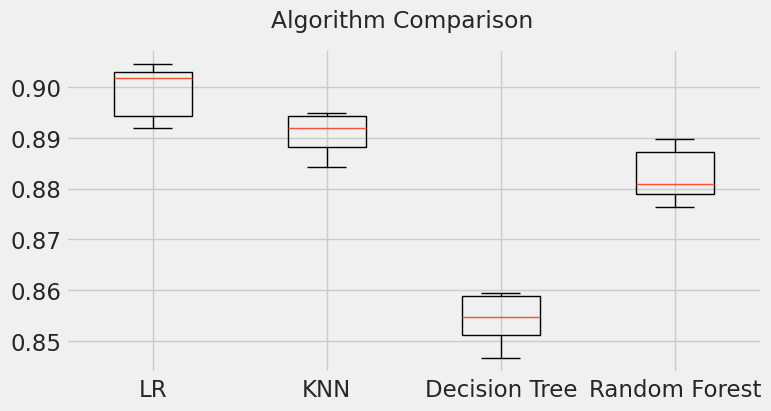

In [118]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Use Stratifield kfold instead of KFold since the classes are imbalaned

In [119]:
from sklearn.model_selection import StratifiedKFold

results = []
names = []


num_folds = 10
seed = 7
scoring = 'accuracy'


for name, model in models:
    
    # Stratified K-Folds cross-validator.
    #     Provides train/test indices to split data in train/test sets.
    #     This cross-validation object is a variation of KFold that returns stratified folds. 
    #     The folds are made by preserving the percentage of samples for each class.
    split = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)
    
    # Compose data preprocessing and model into a single pipeline
    steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Compute cross validation accuracy for each model
    cv_results = cross_val_score(steps, X, y, cv=split, scoring="accuracy", n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    
    # output:
    min_score = round(np.min(cv_results), 4)
    max_score = round(np.max(cv_results), 4)
    mean_score = round(np.mean(results), 4)
    std_dev = round(np.std(results), 4)
    print(f"[{name}] Cross Validation Accuarcy Score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

[LR] Cross Validation Accuarcy Score: 0.8992 +/- 0.0031 (std) min: 0.8922, max: 0.9039
[KNN] Cross Validation Accuarcy Score: 0.8952 +/- 0.0049 (std) min: 0.8866, max: 0.8956
[Decision Tree] Cross Validation Accuarcy Score: 0.8811 +/- 0.0204 (std) min: 0.8504, max: 0.8551
[Random Forest] Cross Validation Accuarcy Score: 0.8817 +/- 0.0178 (std) min: 0.8774, max: 0.8898


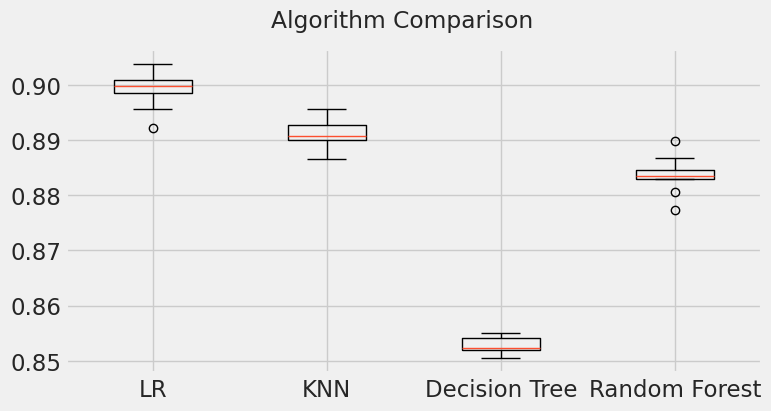

In [120]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Logistic Regression seems to be the best model, Going to optimize the parameter space to find the best hyperparameters and model

## Create Hyperparameter Search Space

In [121]:
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
#C = [.001,.01, 1.0]#uniform(loc=0, scale=4)

# Create hyperparameter options
#hyperparameters = dict(C=C, penalty=penalty)
hyperparameters = {"model__penalty":penalty,
                   "model__C": np.logspace(-4, 4, 20)}   # Has to line up with the name of the model (classifier) in the pipeline

#{'penalty':['l1', 'l2'],
#                   '"logistic__C": np.logspace(-4, 4, 4)':C}
#print(C)

In [122]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])


In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(model, hyperparameters, cv=5, verbose=0)#, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [124]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['model__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['model__C'])

Best Penalty: l2
Best C: 0.03359818286283781


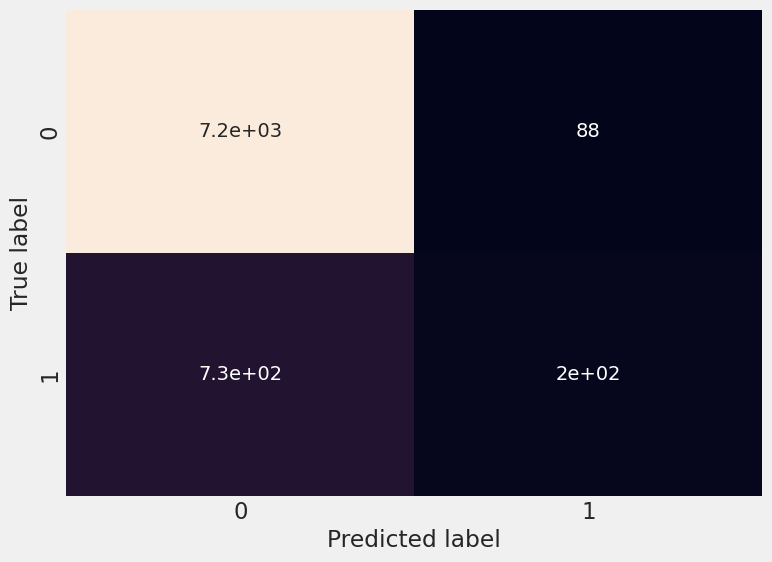

In [125]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = best_model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [126]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.69      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [127]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = best_model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.06670891, 0.05069221, 0.14242953, 0.49982396, 0.05143211,
        0.04891862, 0.40022174, 0.09570267, 0.05760573, 0.84472361]),
 8238)

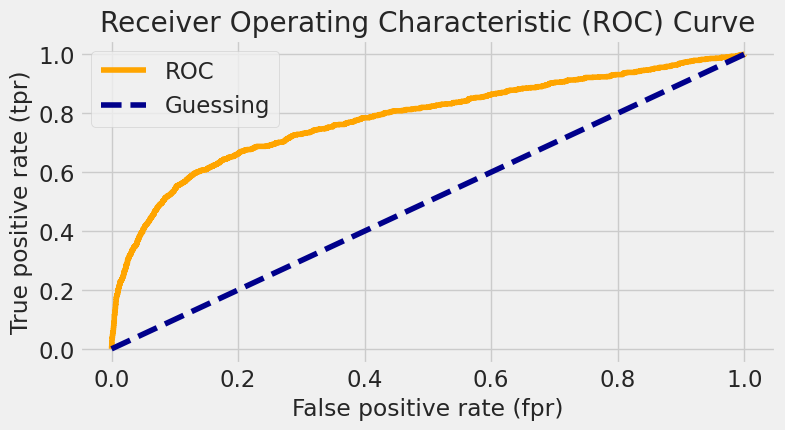

In [128]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

## Create Hyperparameter Grid Search II

In [129]:
#num_features
num_features = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx']

In [130]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [131]:
# Define the Dataset
# Categorical Features
cat_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']



features = num_features + cat_features + ['education', 'month', 'day_of_week'] #, 'month', 'day_of_week']

# Create dataset to train and test
X = bank2[features]
y = bank2["y"]

In [132]:
X.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,job,marital,default,housing,loan,contact,poutcome,education,month,day_of_week
0,56,1,999,0,1.1,93.994,housemaid,married,no,no,no,telephone,nonexistent,basic.4y,may,mon
1,57,1,999,0,1.1,93.994,services,married,unknown,no,no,telephone,nonexistent,high.school,may,mon
2,37,1,999,0,1.1,93.994,services,married,no,yes,no,telephone,nonexistent,high.school,may,mon
3,40,1,999,0,1.1,93.994,admin.,married,no,no,no,telephone,nonexistent,basic.6y,may,mon
4,56,1,999,0,1.1,93.994,services,married,no,no,yes,telephone,nonexistent,high.school,may,mon


In [133]:
# Hyperparameter Space
#------------------------
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C =np.logspace(-4, 4, 20)

# Create hyperparameter options
hyperparameters = {"model__penalty": penalty,
                   "model__C": C}   # Has to line up with the name of the model (classifier) in the pipeline

In [134]:
from sklearn.preprocessing import OrdinalEncoder

# From preprocessed numerical features remove duration 
num_features = num_features #numerical_selected_columns.tolist()#.remove('duration')

#num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
])


# Day of Week Categorical Features
day_feature = ['day_of_week']
day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))   # solver='liblinear'‘liblinear’ - [‘l1’, ‘l2’]
                       ])


In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(model, hyperparameters, cv=5, verbose=0)#, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [136]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['model__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['model__C'])

Best Penalty: l1
Best C: 1.623776739188721


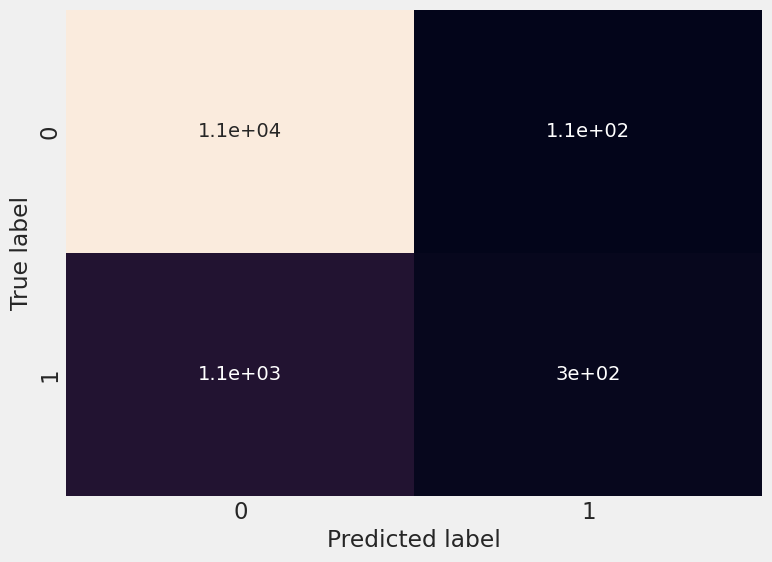

In [137]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = best_model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [138]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10965
         yes       0.73      0.22      0.33      1392

    accuracy                           0.90     12357
   macro avg       0.82      0.60      0.64     12357
weighted avg       0.89      0.90      0.88     12357



In [139]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = best_model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.19612139, 0.02525121, 0.18796257, 0.01444791, 0.31534026,
        0.07434539, 0.07228431, 0.05569232, 0.04396584, 0.04991917]),
 12357)

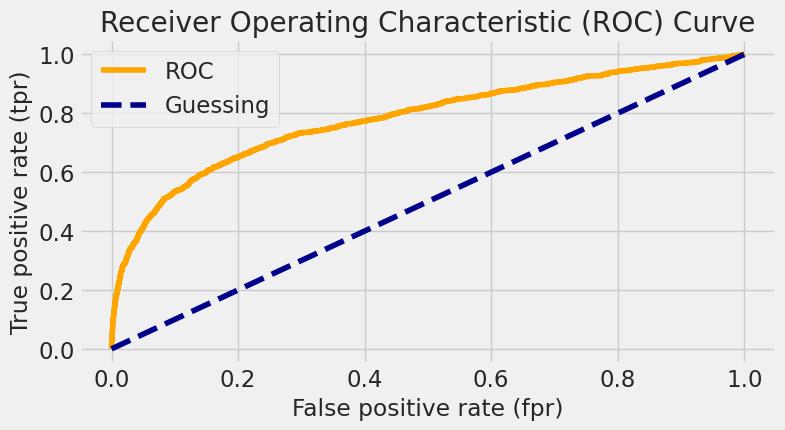

In [140]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

## Hyperparameter Space For RandomForestClassifier

In [141]:
# Hyperparameter Space
#------------------------
from scipy.stats import uniform

param_grid = [
    #{'classifier' : [RandomForestClassifier()],
    {'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}]

In [142]:
from sklearn.preprocessing import OrdinalEncoder

# From preprocessed numerical features remove duration 
num_features = num_features #numerical_selected_columns.tolist()#.remove('duration')

#num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
])


# Day of Week Categorical Features
day_feature = ['day_of_week']
day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])

# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("classifier", RandomForestClassifier())   # solver='liblinear'‘liblinear’ - [‘l1’, ‘l2’]
                       ])

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Create randomized search 5-fold cross validation and 100 iterations
#clf = RandomizedSearchCV(model, hyperparameters, cv=5, verbose=0)#, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
clf = GridSearchCV(model, param_grid, cv=5, verbose=0)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [144]:
# View best hyperparameters
print('Best Number of n estimators:', best_model.best_estimator_.get_params()['classifier__n_estimators'])
print('Best Number of maximum features:', best_model.best_estimator_.get_params()['classifier__max_features'])

Best Number of n estimators: 60
Best Number of maximum features: 11


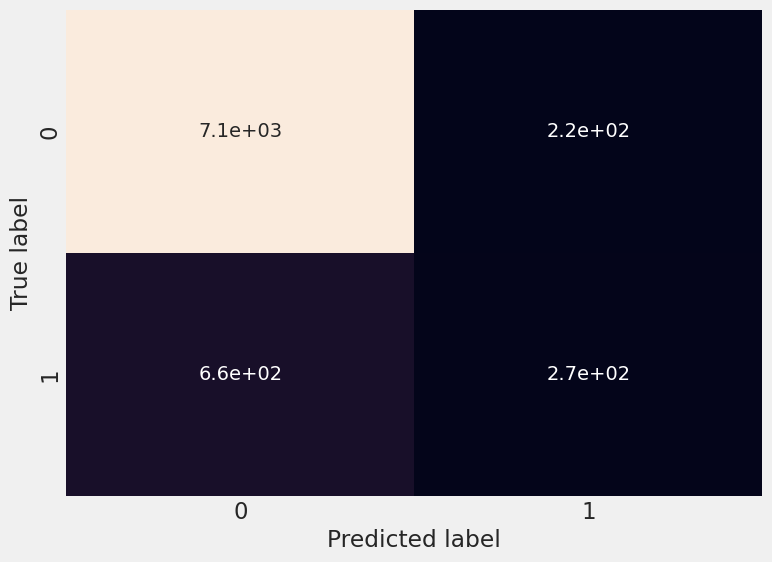

In [145]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = best_model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [146]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7310
         yes       0.55      0.29      0.38       928

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [147]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = best_model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)


(array([0.01666667, 0.01666667, 0.06666667, 0.        , 0.6       ,
        0.16388889, 0.33333333, 0.        , 0.11555556, 0.01666667]),
 8238)

In [148]:
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7693807785744611


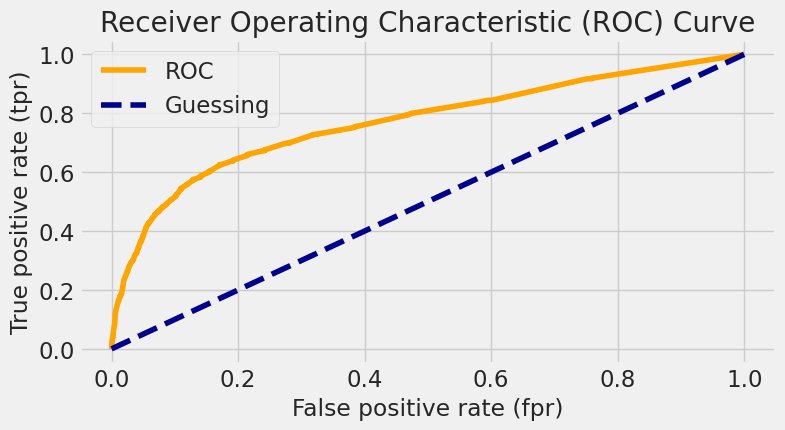

In [149]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

**Notes:**

**OneHotEncoder** can be used for transforming your independent variables according to how one-hot-encoding works. It is not really intended to be used on your dependent variables.

The **OrdinalEncoder** can be used if you can order / rank your independent variables, e.g., small, medium, large, very large. This is also not intended to be used on your dependent variables.

The third one one, **LabelEncoder**, is used when you want to transform your dependent variables into classes, e.g., :
[1, 1, 2, 6] -> [0, 0, 1, 2]. This is only intended to be used with your LABELS, i.e., your dependent variables, and not your independent variables.

## Explore Another Way to Address the Imbalance of Classes (SMOTE)

In [150]:
# Hyperparameter Space
#------------------------
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C =np.logspace(-4, 4, 20)

# Create hyperparameter options
hyperparameters = {"model__penalty": penalty,
                   "model__C": C}   # Has to line up with the name of the model (classifier) in the pipeline

In [151]:
from sklearn.preprocessing import OrdinalEncoder

# From preprocessed numerical features remove duration 
num_features = num_features #numerical_selected_columns.tolist()#.remove('duration')

#num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
])


# Day of Week Categorical Features
day_feature = ['day_of_week']
day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])

In [152]:
# Creating a preprocessing and modelling pipepline (without taking into account )
import imblearn
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbPipeline


sampler = SMOTE()
#smp_pipeline = make_pipeline(sampler, classifier)

#model = Pipeline(steps=[("preprocessor",preprocessor),
#                        ("model", LogisticRegression(solver='liblinear'))   # solver='liblinear'‘liblinear’ - [‘l1’, ‘l2’]
#                       ])

smp_pipeline = imbPipeline(steps=[("preprocessor",preprocessor),
                               ("sampler", sampler),
                        ("model", LogisticRegression(solver='liblinear'))   # solver='liblinear'‘liblinear’ - [‘l1’, ‘l2’]
                       ])


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [153]:
# Create randomized search 5-fold cross validation and 100 iterations
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = RandomizedSearchCV(smp_pipeline, hyperparameters, cv=cv, verbose=0)#, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
#clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [154]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['model__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['model__C'])

Best Penalty: l1
Best C: 1438.44988828766


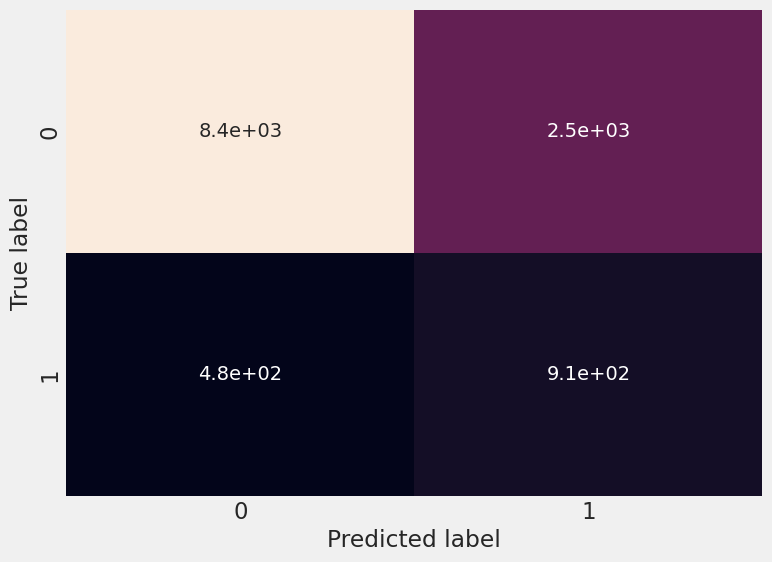

In [155]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = best_model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [156]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.95      0.77      0.85     10965
         yes       0.27      0.66      0.38      1392

    accuracy                           0.76     12357
   macro avg       0.61      0.71      0.61     12357
weighted avg       0.87      0.76      0.80     12357



In [157]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = best_model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.18235639, 0.31720256, 0.18633533, 0.3124014 , 0.15549132,
        0.36039519, 0.19985092, 0.32368252, 0.37082474, 0.42464782]),
 12357)

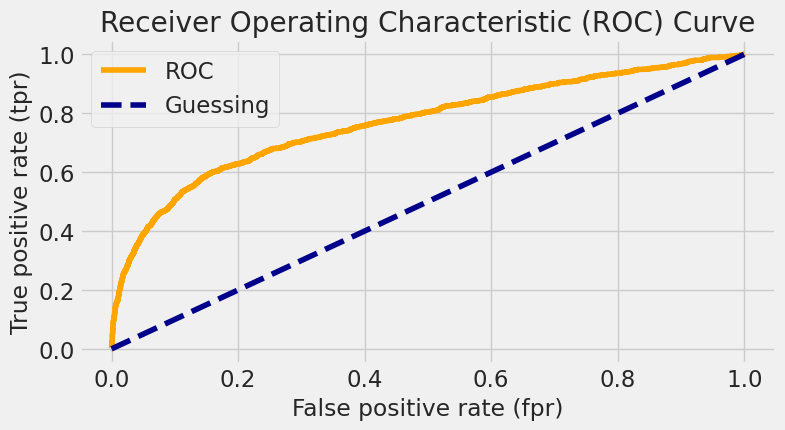

In [158]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

## Add Class weights to Logistic Regression Model

In [159]:
# Machine Learning Imports
#--------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


# Machine Learning Algorithms
#--------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier

# Model Selection
#------------------------------------
from sklearn.model_selection import GridSearchCV


# Metrics
#-------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [160]:
bank2 = pd.read_csv('/kaggle/input/bank-marketing-data-set/bank-additional-full.csv', sep=';')

#  Replace columns names that have periods (.) with an underscore (_)
new_column_names2 = bank2.columns

bank2.columns = new_column_names2.str.replace('.','_')

bank2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [161]:
bank2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [162]:
duplicate = bank2[bank2.duplicated()]
  
print(len(duplicate))

12


In [163]:
bank2.shape

(41188, 21)

In [164]:
bank2 = bank2.drop_duplicates()
bank2.shape

(41176, 21)

In [165]:
#num_features
num_features = ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'nr_employed', 'euribor3m']

# Define the Dataset
# Categorical Features
cat_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# Combine numerical and Categorial features
features = num_features + cat_features + ['education', 'month', 'day_of_week'] #, 'month', 'day_of_week']

# Create dataset to train and test
X = bank2[features]
y = bank2["y"]


# Encode for string labels
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [166]:
X.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,nr_employed,euribor3m,job,marital,default,housing,loan,contact,poutcome,education,month,day_of_week
0,56,1,999,0,1.1,93.994,5191.0,4.857,housemaid,married,no,no,no,telephone,nonexistent,basic.4y,may,mon
1,57,1,999,0,1.1,93.994,5191.0,4.857,services,married,unknown,no,no,telephone,nonexistent,high.school,may,mon
2,37,1,999,0,1.1,93.994,5191.0,4.857,services,married,no,yes,no,telephone,nonexistent,high.school,may,mon
3,40,1,999,0,1.1,93.994,5191.0,4.857,admin.,married,no,no,no,telephone,nonexistent,basic.6y,may,mon
4,56,1,999,0,1.1,93.994,5191.0,4.857,services,married,no,no,yes,telephone,nonexistent,high.school,may,mon


In [167]:
bank2['nr_employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64

In [168]:
bank2['euribor3m'].value_counts()

4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

In [169]:
bank2['emp_var_rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

In [170]:
bank2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

In [171]:
# Hyperparameter Space
#------------------------
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C =np.logspace(-4, 4, 20)

# Create hyperparameter options
hyperparameters = {"model__penalty": penalty,
                   "model__C": C}   # Has to line up with the name of the model (classifier) in the pipeline


In [172]:
#bank2[num_features].head()

In [173]:
# From preprocessed numerical features remove duration 
num_features = num_features #numerical_selected_columns.tolist()#.remove('duration')

#num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
])


# Day of Week Categorical Features
day_feature = ['day_of_week']
day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])

In [174]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, stratify=y)

In [175]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'nr_employed', 'euribor3m', 'job', 'marital',
       'default', 'housing', 'loan', 'contact', 'poutcome', 'education',
       'month', 'day_of_week'],
      dtype='object')

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score



# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear', class_weight='balanced'))
                       ])


In [177]:

num_folds = 10
seed = 7
scoring = 'roc_auc'


# define evaluation procedure
split = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=split ,scoring='roc_auc', n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.782


In [178]:
scores

array([0.77439393, 0.79716281, 0.75951724, 0.79759018, 0.80459846,
       0.77742494, 0.77921634, 0.76981023, 0.79056472, 0.76817616])

In [179]:
X_train

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,nr_employed,euribor3m,job,marital,default,housing,loan,contact,poutcome,education,month,day_of_week
39547,31,1,999,0,-1.8,93.749,5008.7,0.659,self-employed,single,no,no,no,cellular,nonexistent,university.degree,apr,thu
4958,49,2,999,0,1.1,93.994,5191.0,4.858,management,married,no,yes,no,telephone,nonexistent,university.degree,may,wed
6594,43,1,999,0,1.1,93.994,5191.0,4.857,housemaid,married,unknown,yes,yes,telephone,nonexistent,basic.4y,may,wed
7114,39,3,999,0,1.1,93.994,5191.0,4.860,services,married,no,no,no,telephone,nonexistent,high.school,may,thu
1464,57,2,999,0,1.1,93.994,5191.0,4.855,services,divorced,unknown,no,yes,telephone,nonexistent,high.school,may,thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32798,36,1,999,1,-1.8,92.893,5099.1,1.299,admin.,single,no,yes,no,cellular,failure,university.degree,may,mon
38756,33,1,3,1,-3.4,92.649,5017.5,0.715,admin.,married,no,yes,no,telephone,success,university.degree,nov,wed
37321,31,1,4,3,-2.9,92.201,5076.2,0.883,admin.,single,no,no,no,cellular,success,university.degree,aug,tue
35096,29,2,999,1,-1.8,92.893,5099.1,1.250,services,single,no,yes,no,cellular,failure,basic.9y,may,fri


In [180]:
split = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(model, hyperparameters, cv=split, verbose=0)#, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


# Fit randomized search
best_model = clf.fit(X_train, y_train)


# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['model__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['model__C'])

Best Penalty: l1
Best C: 0.0001


In [181]:
# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", LogisticRegression(solver='liblinear'))#,class_weight='balanced'))
                       ])




balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
#param_grid = dict(class_weight=balance)


hyperparameters = {"model__penalty": penalty,
                   "model__C": C,
                   "model__class_weight": balance}  

# define evaluation procedure
split = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


clf = GridSearchCV(model, hyperparameters, cv=split, scoring='roc_auc', n_jobs=-1)

# Fit randomized search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['model__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['model__C'])

Best Penalty: l1
Best C: 0.012742749857031334


In [182]:
# report the best configuration
print("Best: %f using %s" % (best_model.best_score_, best_model.best_params_))
# report all configurations
means = best_model.cv_results_['mean_test_score']
stds = best_model.cv_results_['std_test_score']
params = best_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.783097 using {'model__C': 0.012742749857031334, 'model__class_weight': {0: 1, 1: 100}, 'model__penalty': 'l1'}
0.459403 (0.020269) with: {'model__C': 0.0001, 'model__class_weight': {0: 100, 1: 1}, 'model__penalty': 'l1'}
0.540507 (0.016024) with: {'model__C': 0.0001, 'model__class_weight': {0: 100, 1: 1}, 'model__penalty': 'l2'}
0.455432 (0.018037) with: {'model__C': 0.0001, 'model__class_weight': {0: 10, 1: 1}, 'model__penalty': 'l1'}
0.611445 (0.013990) with: {'model__C': 0.0001, 'model__class_weight': {0: 10, 1: 1}, 'model__penalty': 'l2'}
0.456015 (0.012894) with: {'model__C': 0.0001, 'model__class_weight': {0: 1, 1: 1}, 'model__penalty': 'l1'}
0.696480 (0.011829) with: {'model__C': 0.0001, 'model__class_weight': {0: 1, 1: 1}, 'model__penalty': 'l2'}
0.750800 (0.011918) with: {'model__C': 0.0001, 'model__class_weight': {0: 1, 1: 10}, 'model__penalty': 'l1'}
0.772110 (0.013857) with: {'model__C': 0.0001, 'model__class_weight': {0: 1, 1: 10}, 'model__penalty': 'l2'}
0.721298 

In [183]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(conf_mat,
                     annot=True,      # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")


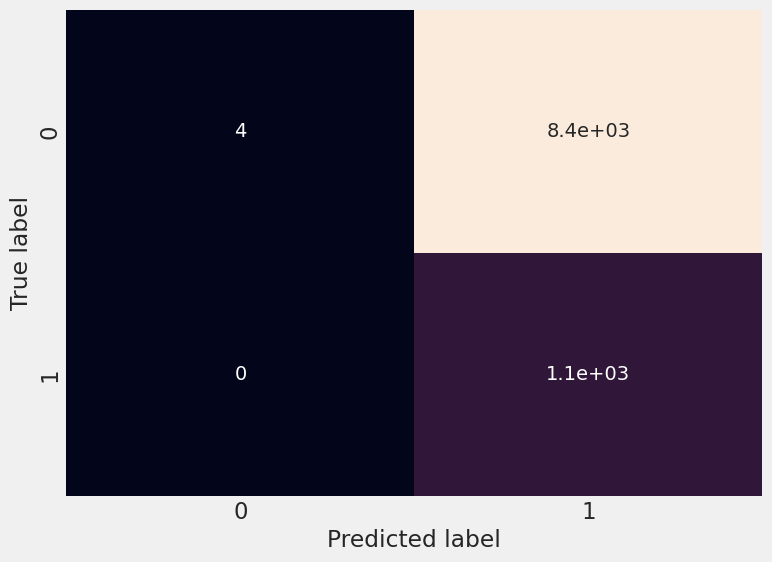

In [184]:
# Use the model to make predictions on the test data (further evaluation)
y_preds = best_model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat) 

In [185]:
confusion_matrix(y_test, y_preds)

array([[   4, 8400],
       [   0, 1067]])

In [186]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      8404
           1       0.11      1.00      0.20      1067

    accuracy                           0.11      9471
   macro avg       0.56      0.50      0.10      9471
weighted avg       0.90      0.11      0.02      9471



In [187]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = best_model.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)#, pos_label='yes')

#y_probs[:10], len(y_probs)
y_probs_positive[:10], len(y_probs_positive)

(array([0.78126003, 0.83764712, 0.92867932, 0.85840475, 0.86355159,
        0.80325739, 0.95396471, 0.86424442, 0.85510033, 0.88402916]),
 9471)

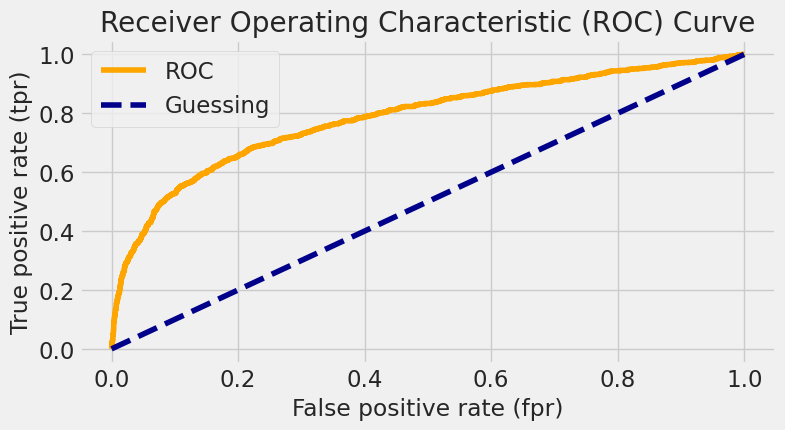

In [188]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Use fivethirtyeight style
    plt.style.use('fivethirtyeight')
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [189]:
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7854000326528137


## References

* [Classification Models a Cautionary Tale](https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3)
* [Cost-sensitive-logistic-regression](https://machinelearningmastery.com/cost-sensitive-logistic-regression/)
* [machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing](https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c)
* [fourth item](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922)
* []()

In [190]:
import xgboost as xgb

#xgb_cl = xgb.XGBClassifier()

In [191]:
# From preprocessed numerical features remove duration 
num_features = num_features 


# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Education Categorical Features
education_feature = ['education']
educ_pipeline = Pipeline(steps=[
    ("ordinal_educ", OrdinalEncoder(categories=[education_order]))
])

# Month Categorical Features
month_feature = ['month']
month_pipeline = Pipeline(steps=[
    ("ordinal_month", OrdinalEncoder(categories=[month_order]))
    ])

# Day of Week Categorical Features
day_feature = ['day_of_week']

day_pipeline = Pipeline(steps=[
    ("ordinal_day", OrdinalEncoder(categories=[day_order]))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num",  num_pipeline, num_features),
    ("cat",  cat_pipeline, cat_features),
    ("educ", educ_pipeline, education_feature),
    ("month", month_pipeline, month_feature),
    ("day", day_pipeline, day_feature)
])

In [192]:
# Creating a preprocessing and modelling pipepline (without taking into account )
model_xgb = Pipeline(steps=[("preprocessor",preprocessor),
                        ("xgb_cl", xgb.XGBClassifier())
                       ])

In [193]:
num_folds = 10
seed = 7
scoring = 'roc_auc'


# define evaluation procedure
split = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# evaluate model
scores = cross_val_score(model_xgb, X_train, y_train, cv=split ,scoring='roc_auc', n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.786
